# Data
- result : list of simulation datasets, inherent clusters, found clusters by 5 clustering methods, monoton functions by MOCL etc.
- rand : mean values of rand index between found clusters and inherent ordinal&nominal clusters
- var_sel : mean of variable selection accuracy (ordinal, nominal, noise)

In [231]:
library(latex2exp)
library(Rtsne)
library(ggplot2)
library(gridExtra)

source("./Functions/MOCL.R") 
source("./Functions/lambda_selection.R")
source("./Functions/MOCL_wcss.R")
source("./Functions/Adaptive_MAM.R") 

source("./Functions/SKM_gap.R")
source("./Functions/evaluation.R")


data_k4=readRDS("Baseball_K4.RData")
data_k5=readRDS("Baseball_K5.RData")
data_k6=readRDS("Baseball_K6.RData")

# Plots of clusters with K=5 (main paper)

In [232]:
result_lst=data_k5
X=result_lst$X
y=result_lst$y
cluster_mat=as.matrix(result_lst$cluster_mat)
sparse_mat=result_lst$var_sel
mocl=result_lst$mocl
fx_mslasso=result_lst$fx_mslasso

kk=length(unique(cluster_mat[,1]))

clu_mocl=cluster_mat[,colnames(cluster_mat)=="MOCL"]
clu_skm=cluster_mat[,colnames(cluster_mat)=="SKM"]
clu_vsl=cluster_mat[,colnames(cluster_mat)=="VSL"]
clu_km=cluster_mat[,colnames(cluster_mat)=="Kmpp"]
clu_pam=cluster_mat[,colnames(cluster_mat)=="PAM"]

lab_mocl=as.factor(clu_mocl)
lab_skm=as.factor(clu_skm)
lab_vsl=as.factor(clu_vsl)
lab_km=as.factor(clu_km)
lab_pam=as.factor(clu_pam)

## t-sne

In [233]:
set.seed(243)
tsne<-Rtsne(X,dim=2,perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 132 x 9 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.821281)!
Learning embedding...
Iteration 50: error is 50.075463 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.493878 (50 iterations in 0.01 seconds)
Iteration 150: error is 52.334448 (50 iterations in 0.01 seconds)
Iteration 200: error is 54.661886 (50 iterations in 0.01 seconds)
Iteration 250: error is 51.110302 (50 iterations in 0.01 seconds)
Iteration 300: error is 1.211924 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.577932 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.383346 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.380553 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.380810 (50 iterations in 0.00 seconds)
Fitting performed in 0.08 seconds.


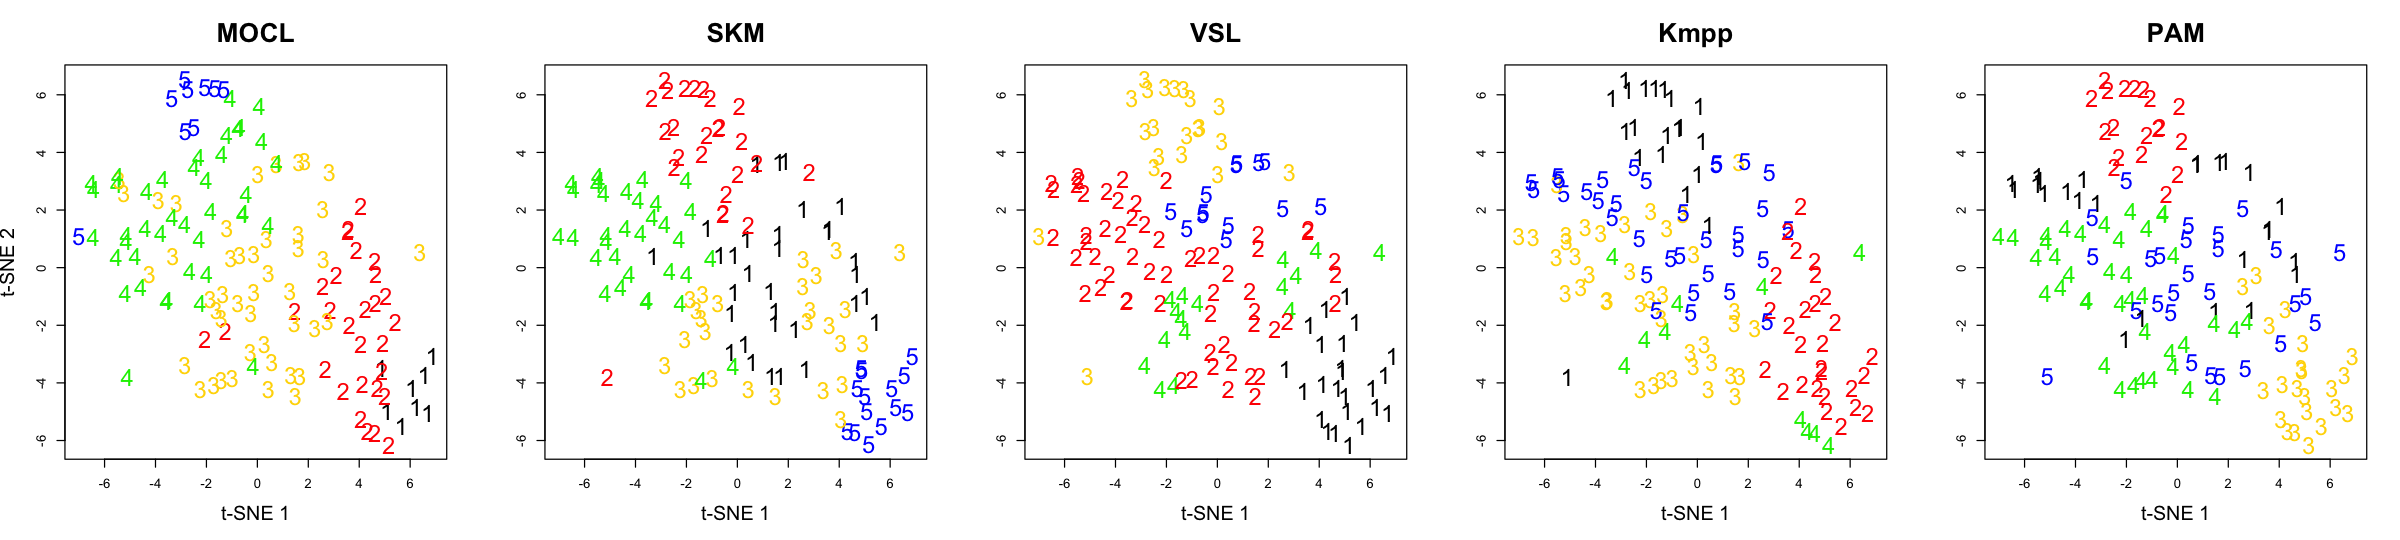

In [234]:
options(repr.plot.width = 20, repr.plot.height = 4.5)
par(mfrow=c(1,5))

colors=c("Black","Red","Gold","Green 2","Blue")

names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne$Y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.8)

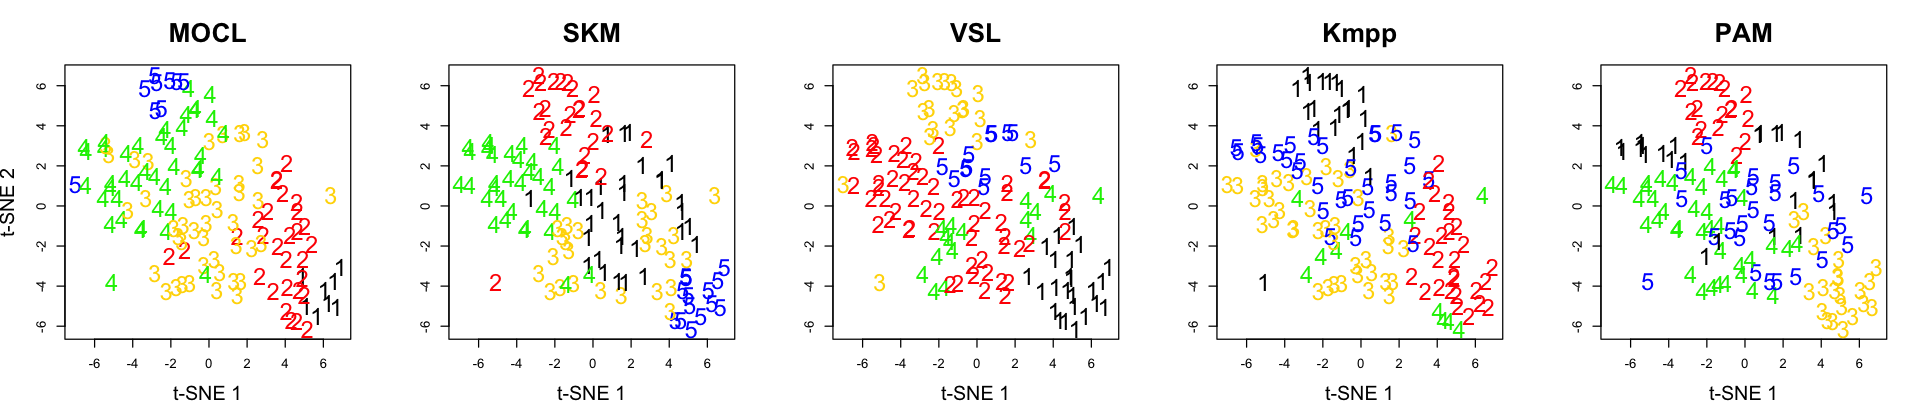

In [235]:
options(repr.plot.width = 16, repr.plot.height = 3.5)
par(mfrow=c(1,5))

colors=c("Black","Red","Gold","Green 2","Blue")

names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne$Y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.8)

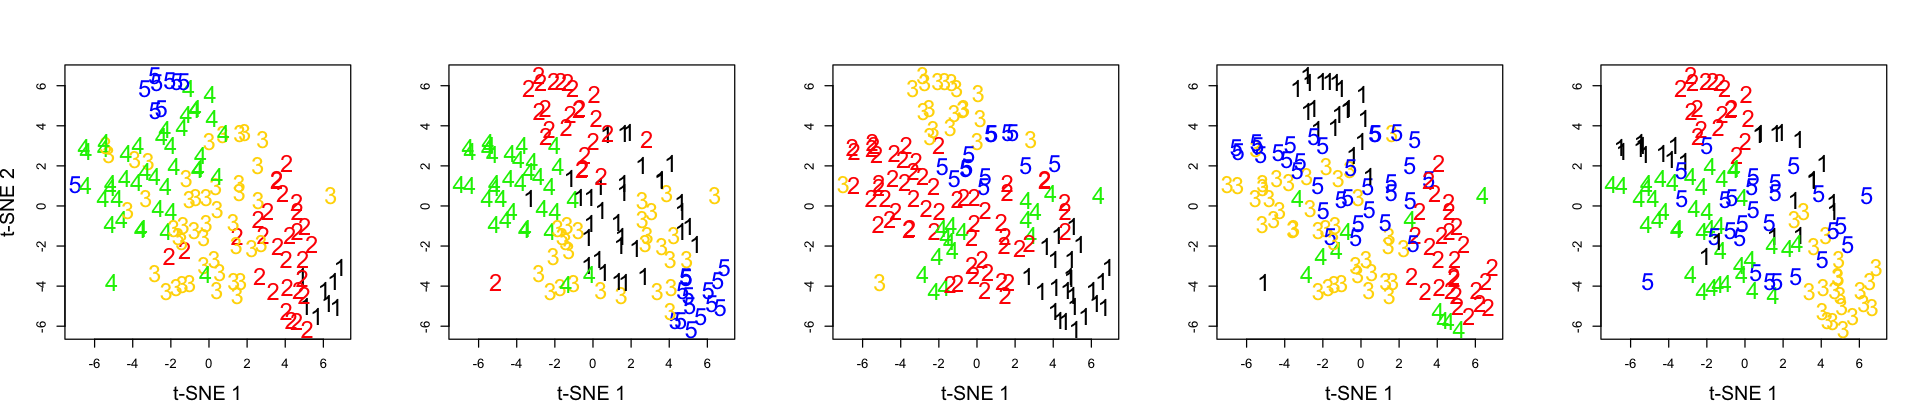

In [236]:
options(repr.plot.width = 16, repr.plot.height = 3.5)
par(mfrow=c(1,5))

colors=c("Black","Red","Gold","Green 2","Blue")

names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main=" ",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main=" ",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main=" ",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne$Y,t='n',col=lab_km,pch=19,main=" ",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main=" ",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.8)

## Relation between MOCL clusters and wOBA

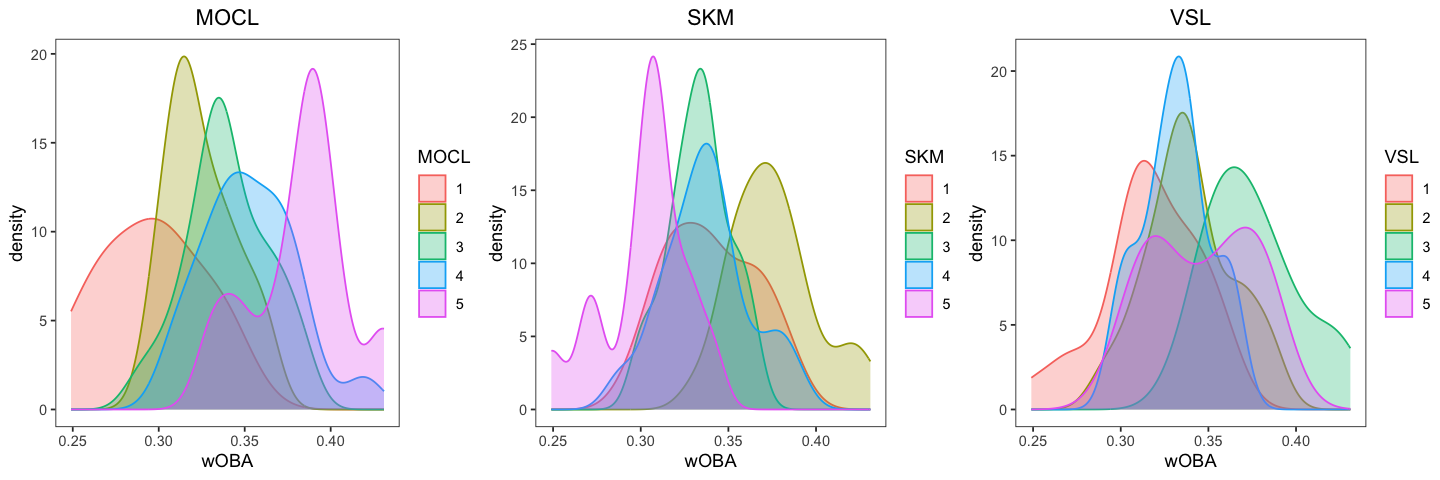

In [223]:
options(repr.plot.width = 12, repr.plot.height = 4)

y_clu=as.data.frame(cbind(result_lst$y,result_lst$cluster_mat))
colnames(y_clu)=c("wOBA",colnames(result_lst$cluster_mat))

y_clu$MOCL=as.factor(y_clu$MOCL)
y_clu$SKM=as.factor(y_clu$SKM)
y_clu$VSL=as.factor(y_clu$VSL)

g_mocl=ggplot(data=y_clu)+
        geom_density(mapping=aes(x=wOBA,colour=MOCL,fill=MOCL),alpha=0.3)+
        theme_test()+labs(title="MOCL")+
        theme(plot.title=element_text(hjust=0.5))

g_skm=ggplot(data=y_clu)+
        geom_density(mapping=aes(x=wOBA,colour=SKM,fill=SKM),alpha=0.3)+
        theme_test()+labs(title="SKM")+
        theme(plot.title=element_text(hjust=0.5))

g_vsl=ggplot(data=y_clu)+
        geom_density(mapping=aes(x=wOBA,colour=VSL,fill=VSL),alpha=0.3)+
        theme_test()+labs(title="VSL")+
        theme(plot.title=element_text(hjust=0.5))

grid.arrange(g_mocl,g_skm,g_vsl,ncol=3)

### Functions estimated by MOCL

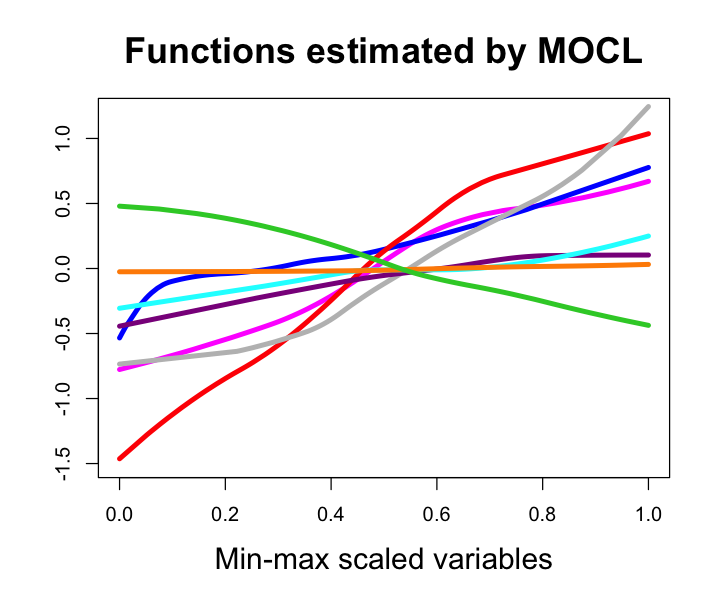

In [224]:
dd=nor_minmax(X)
col_lst=c("Magenta","Blue","Gold","red","grey","Dark Magenta","Cyan","Dark Orange","Lime Green")

dd_mo=dd[,sparse_mat[1,]>0]
col_mo=col_lst[sparse_mat[1,]>0]
fx_mo=-mocl$fx[,sparse_mat[1,]>0]

options(repr.plot.width = 6, repr.plot.height = 5)
#par(mfrow=c(1,2))
for(i in 1:ncol(dd_mo)){
    o_i=order(dd_mo[,i])
    if(i==1){
        plot(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],type="l",
             lwd=4,ylim=c(-1.5,1.2),xlim=c(0,1),main="Functions estimated by MOCL",
            xlab="Min-max scaled variables",ylab="",cex.main=1.8,cex.lab=1.5)
    }else{lines(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],lwd=4)}
}

### Estimated functions by MOCL and MsLasso

In [225]:
dd_ms=nor_minmax(X)[,apply(fx_mslasso,2,mean)^2>0]
fx_ms=fx_mslasso[,apply(fx_mslasso,2,mean)^2>0]
col_ms=col_lst[apply(fx_mslasso,2,mean)^2>0]

In [226]:
col_lst

[1] "Magenta"      "Blue"         "Gold"         "red"          "grey"        
[6] "Dark Magenta" "Cyan"         "Dark Orange"  "Lime Green"

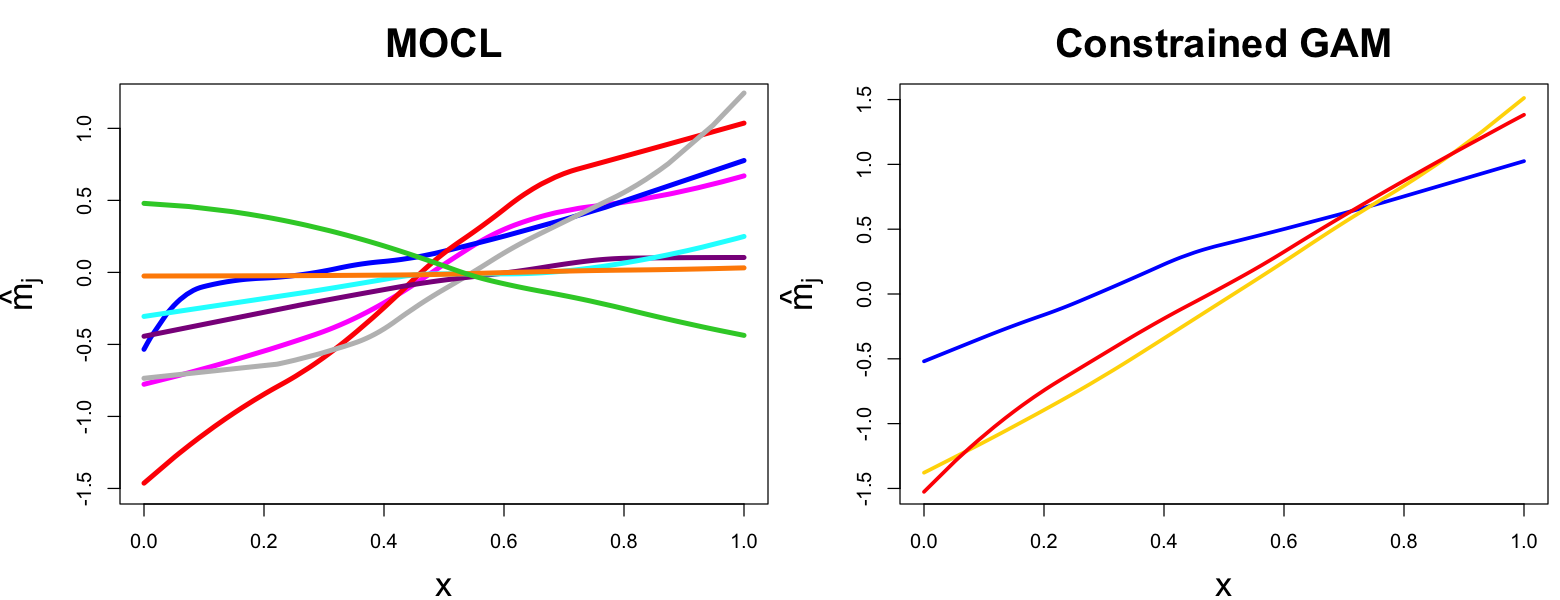

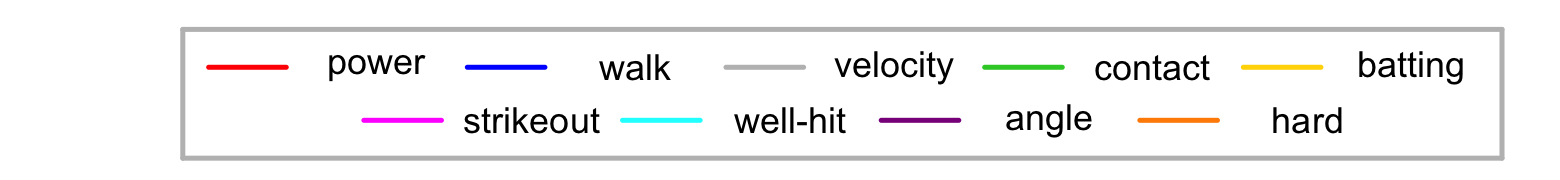

In [227]:
options(repr.plot.width = 13, repr.plot.height = 5)
par(mfrow=c(1,2))
par(mar=c(4,5,3.5,0.5))


## fx estimated by MOCL
for(i in 1:ncol(dd_mo)){
    o_i=order(dd_mo[,i])
    if(i==1){
        plot(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],type="l",
             lwd=4,ylim=c(-1.5,1.2),xlim=c(0,1),main="MOCL",
            xlab=TeX("$x$"),ylab=TeX("$\\hat{m}_j$"),cex.main=2,cex.lab=1.7)
    }else{lines(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],lwd=4)}
}

## fx estimated by MSlasso
plot(dd_ms[order(dd_ms[,1]),1],fx_ms[order(dd_ms[,1]),1],
     type="l",lwd=3,col=col_ms[1],main="Constrained GAM",
    xlab=TeX("$x$"),ylab=TeX("$\\hat{m}_j$"),cex.main=2,cex.lab=1.7,ylim=c(-1.5,1.5))

lines(dd_ms[order(dd_ms[,2]),2],fx_ms[order(dd_ms[,2]),2],
     type="l",lwd=3,col=col_ms[2])

lines(dd_ms[order(dd_ms[,3]),3],fx_ms[order(dd_ms[,3]),3],
     type="l",lwd=3,col=col_ms[3])



######################################################################
####################### Legend ####################################
col_lst=c("Red","Blue","Grey","Lime Green","Gold",
         "Magenta","Cyan","Dark Magenta","Dark Orange")
var_lst=c("power","walk","velocity","contact","batting",
         "strikeout","well-hit","angle","hard")

options(repr.plot.width = 13, repr.plot.height = 1.5)
par(mar=c(0,6,0,0.8))
par(mfrow=c(1,1))
text_lst=c("MOCL","SKM","VSL","Kmpp","PAM")

plot(0,xlim=c(0,1),ylim=c(9.7,10.8), axes = FALSE, xlab = "", ylab = "", type = "n")
#lines(c())
for(i in c(1:5)){
    y_l=10.4
    lines(c(0,0.06)+0.2*(i-1)+0.01,c(y_l,y_l),lwd=4,col=col_lst[i])
    text(0.14+0.2*(i-1),y_l,var_lst[i],cex=1.8)
}

for(i in c(6:10)){
    y_l=10.05
    lines(c(0,0.06)+0.2*(i-6)+0.13,c(y_l,y_l),lwd=4,col=col_lst[i])
    text(0.14+0.2*(i-6)+0.12,y_l,var_lst[i],cex=1.8)
}

# grey box
lines(c(-0.01,1.01),c(10.65,10.65),lwd=4,col="grey")
lines(c(-0.01,1.01),c(9.8,9.8),lwd=4,col="grey")
lines(c(-0.01,-0.01),c(9.8,10.65),lwd=4,col="grey")
lines(c(1.01,1.01),c(9.8,10.65),lwd=4,col="grey")

# Plots of clusters with K=4 & 6 (appendix)

## t-sne

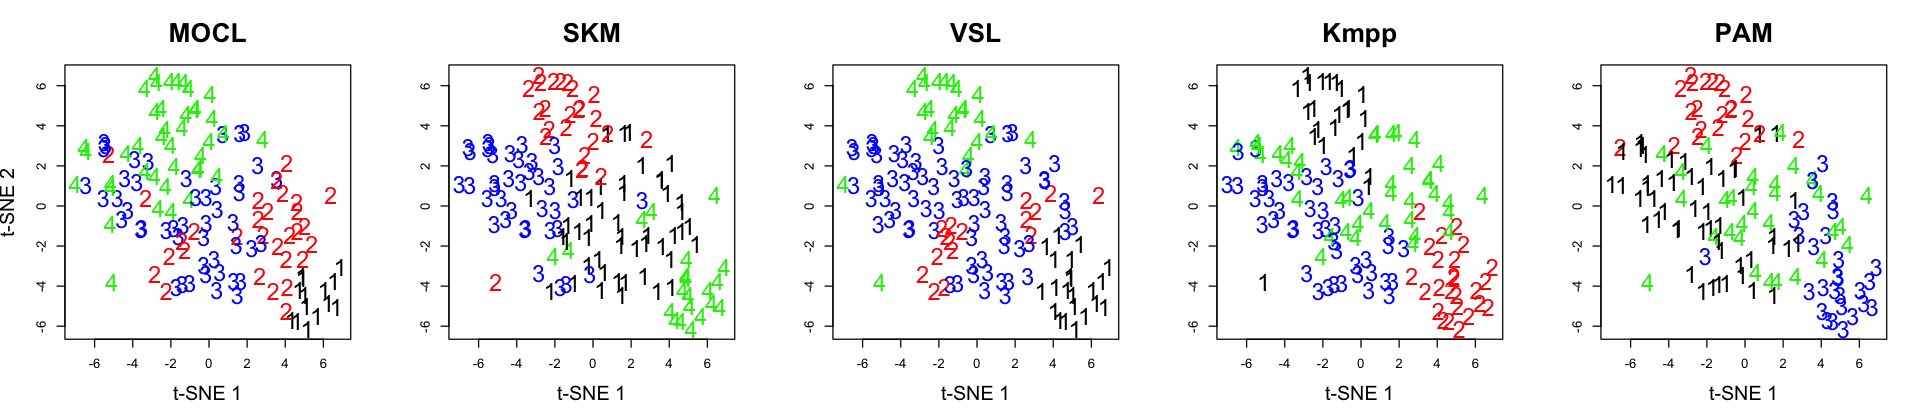

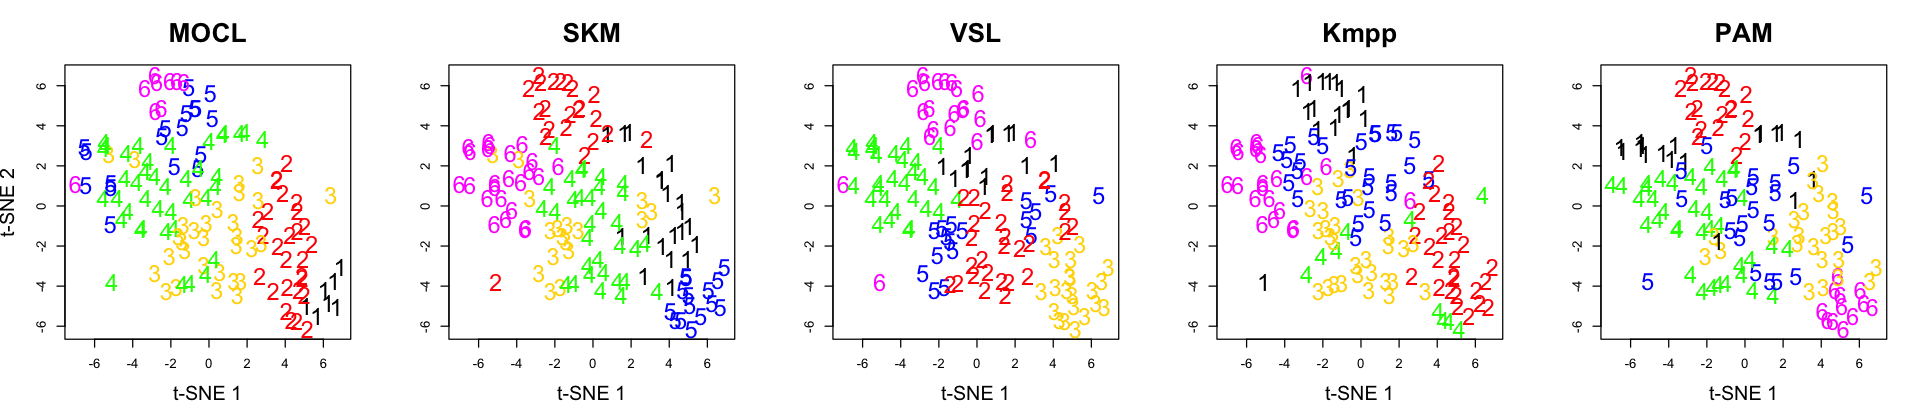

In [228]:
##########################################################
## K=4
cluster_mat=as.matrix(data_k4$cluster_mat)

lab_mocl=as.factor(cluster_mat[,colnames(cluster_mat)=="MOCL"])
lab_skm=as.factor(cluster_mat[,colnames(cluster_mat)=="SKM"])
lab_vsl=as.factor(cluster_mat[,colnames(cluster_mat)=="VSL"])
lab_km=as.factor(cluster_mat[,colnames(cluster_mat)=="Kmpp"])
lab_pam=as.factor(cluster_mat[,colnames(cluster_mat)=="PAM"])

kk=length(unique(cluster_mat[,1]))




options(repr.plot.width = 16, repr.plot.height = 3.5)
par(mfrow=c(1,5))

colors=c("Black","Red","Blue","green 2")
names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne$Y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.8)


##########################################################
## K=6
cluster_mat=as.matrix(data_k6$cluster_mat)

kk=length(unique(cluster_mat[,1]))
lab_mocl=as.factor(cluster_mat[,colnames(cluster_mat)=="MOCL"])
lab_skm=as.factor(cluster_mat[,colnames(cluster_mat)=="SKM"])
lab_vsl=as.factor(cluster_mat[,colnames(cluster_mat)=="VSL"])
lab_km=as.factor(cluster_mat[,colnames(cluster_mat)=="Kmpp"])
lab_pam=as.factor(cluster_mat[,colnames(cluster_mat)=="PAM"])

options(repr.plot.width = 16, repr.plot.height = 3.5)
par(mfrow=c(1,5))

colors=c("Black","Red","Gold","green","Blue","Magenta")
names(colors) = c(1:kk)

plot(tsne$Y,t='n',col=lab_mocl,pch=19,main="MOCL",cex.main=2,xlab="t-SNE 1",ylab="t-SNE 2",cex.lab=1.5)
text(tsne$Y, labels=lab_mocl, col=colors[lab_mocl],cex=1.8)
plot(tsne$Y,t='n',col=lab_skm,pch=19,main="SKM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_skm, col=colors[lab_skm],cex=1.8)
plot(tsne$Y,t='n',col=lab_vsl,pch=19,main="VSL",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_vsl, col=colors[lab_vsl],cex=1.8)
plot(tsne$Y,t='n',col=lab_km,pch=19,main="Kmpp",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_km, col=colors[lab_km],cex=1.8)
plot(tsne$Y,t='n',col=lab_pam,pch=19,main="PAM",cex.main=2,xlab="t-SNE 1",ylab=" ",cex.lab=1.5)
text(tsne$Y, labels=lab_pam, col=colors[lab_pam],cex=1.8)

## Monotone Functions

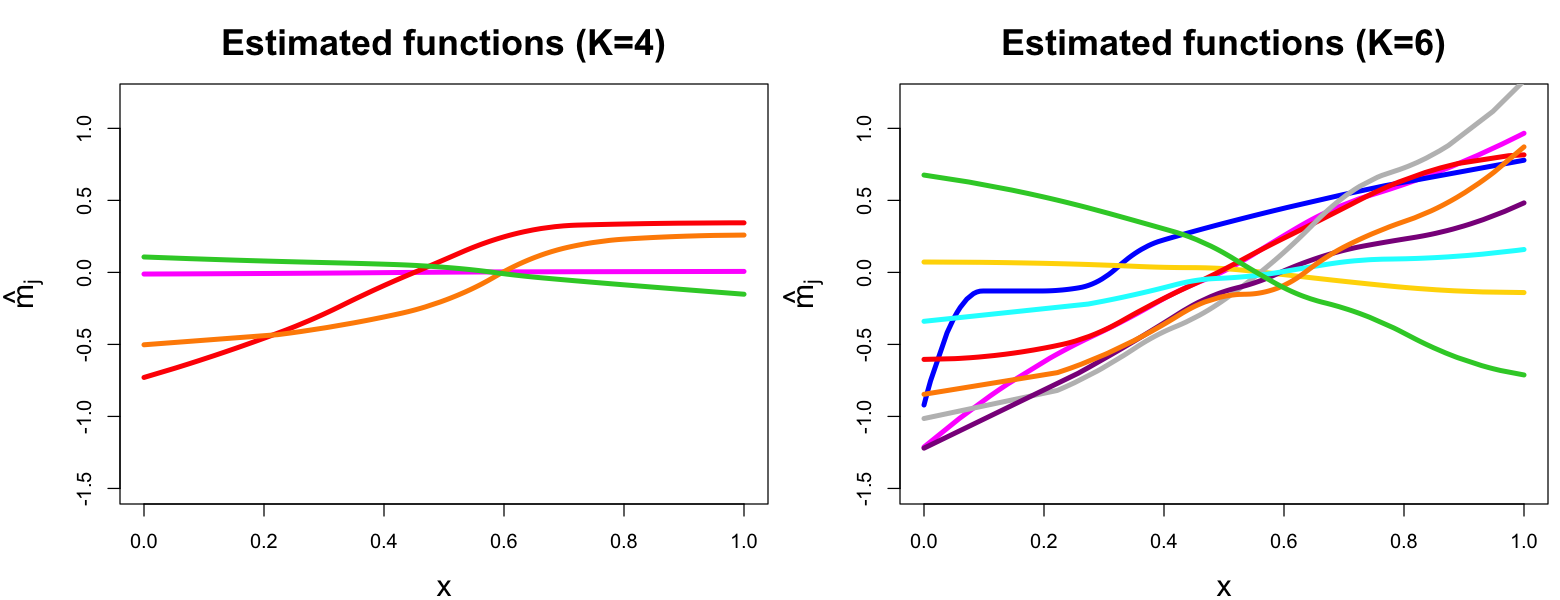

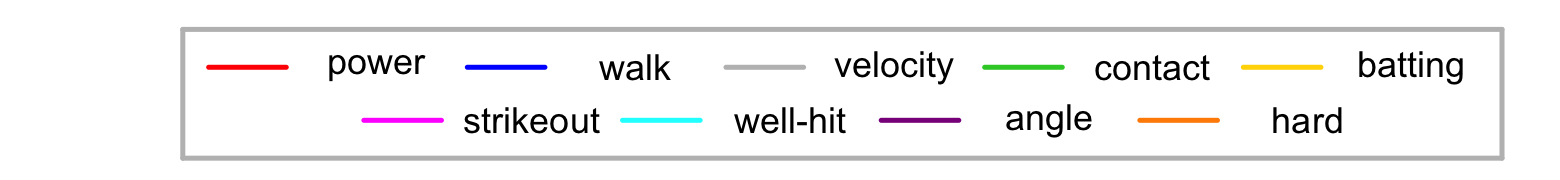

In [229]:
dd=nor_minmax(X)
col_lst=c("Magenta","Blue","Gold","red","grey","Dark Magenta","Cyan","Dark Orange","Lime Green")

options(repr.plot.width = 13, repr.plot.height = 5)
par(mfrow=c(1,2))
par(mar=c(4,5,3.5,0.5))

##################################################
#### K=4
sparse_mat=data_k4$var_sel
mocl=data_k4$mocl

dd_mo=dd[,sparse_mat[1,]>0]
col_mo=col_lst[sparse_mat[1,]>0]
fx_mo=-mocl$fx[,sparse_mat[1,]>0]


for(i in 1:ncol(dd_mo)){
    o_i=order(dd_mo[,i])
    if(i==1){
        plot(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],type="l",
             lwd=4,ylim=c(-1.5,1.2),xlim=c(0,1),main="Estimated functions (K=4)",
            xlab=TeX("$x$"),ylab=TeX("$\\hat{m}_j$"),cex.main=1.8,cex.lab=1.5)
    }else{lines(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],lwd=4)}
}

##################################################
#### K=6
sparse_mat=data_k6$var_sel
mocl=data_k6$mocl

dd_mo=dd[,sparse_mat[1,]>0]
col_mo=col_lst[sparse_mat[1,]>0]
fx_mo=-mocl$fx[,sparse_mat[1,]>0]


for(i in 1:ncol(dd_mo)){
    o_i=order(dd_mo[,i])
    if(i==1){
        plot(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],type="l",
             lwd=4,ylim=c(-1.5,1.2),xlim=c(0,1),main="Estimated functions (K=6)",
            xlab=TeX("$x$"),ylab=TeX("$\\hat{m}_j$"),cex.main=1.8,cex.lab=1.5)
    }else{lines(dd_mo[o_i,i],fx_mo[o_i,i],col=col_mo[i],lwd=4)}
}

######################################################################
####################### Legend ####################################
col_lst=c("Red","Blue","Grey","Lime Green","Gold",
         "Magenta","Cyan","Dark Magenta","Dark Orange")
var_lst=c("power","walk","velocity","contact","batting",
         "strikeout","well-hit","angle","hard")

options(repr.plot.width = 13, repr.plot.height = 1.5)
par(mar=c(0,6,0,0.8))
par(mfrow=c(1,1))
text_lst=c("MOCL","SKM","VSL","Kmpp","PAM")

plot(0,xlim=c(0,1),ylim=c(9.7,10.8), axes = FALSE, xlab = "", ylab = "", type = "n")
#lines(c())
for(i in c(1:5)){
    y_l=10.4
    lines(c(0,0.06)+0.2*(i-1)+0.01,c(y_l,y_l),lwd=4,col=col_lst[i])
    text(0.14+0.2*(i-1),y_l,var_lst[i],cex=1.8)
}

for(i in c(6:10)){
    y_l=10.05
    lines(c(0,0.06)+0.2*(i-6)+0.13,c(y_l,y_l),lwd=4,col=col_lst[i])
    text(0.14+0.2*(i-6)+0.12,y_l,var_lst[i],cex=1.8)
}

# grey box
lines(c(-0.01,1.01),c(10.65,10.65),lwd=4,col="grey")
lines(c(-0.01,1.01),c(9.8,9.8),lwd=4,col="grey")
lines(c(-0.01,-0.01),c(9.8,10.65),lwd=4,col="grey")
lines(c(1.01,1.01),c(9.8,10.65),lwd=4,col="grey")